In [1]:
import sys
sys.path.insert(0,"../")
import Constants.SI as SI
import eBeam_v02 as eb
import numpy as np
import plotty as pl
from importlib import reload as rel
c = SI.lightSpeed;


In [29]:
beamParams = eb.get_beam()
pos = eb.get_pos(beamParams, nxi = 5)

In [30]:
Er, rPeak, EPeak = eb.rad_E_field(pos, beamParams)

In [31]:
W_Ar1 = eb.ionization_rate(Er, 'Ar+')
W_Ar2 = eb.ionization_rate(Er,  'Ar2+')
W_He1 = eb.ionization_rate(Er, 'He+')
W_He2 = eb.ionization_rate(Er,  'He2+')

In [32]:
ion_frac_Ar1, max_ion_Ar1 = eb.ionization_frac(W_Ar1, pos, beamParams)
ion_frac_Ar2, max_ion_Ar2 = eb.ionization_frac(W_Ar2, pos, beamParams)
ion_frac_He1, max_ion_He1 = eb.ionization_frac(W_He1, pos, beamParams)
ion_frac_He2, max_ion_He2 = eb.ionization_frac(W_He2, pos, beamParams)

In [33]:
width_Ar1 = eb.neutral_ring_width(ion_frac_Ar1, pos)
width_Ar2 = eb.neutral_ring_width(ion_frac_Ar2, pos)
width_He1 = eb.neutral_ring_width(ion_frac_He1, pos)
width_He2 = eb.neutral_ring_width(ion_frac_He2, pos)
widths = [width_Ar1, width_Ar2, width_He1, width_He2]

In [34]:
max_frac = [max_ion_Ar1, max_ion_Ar2, max_ion_He1, max_ion_He2]
plasmaNames = ['Ar+', 'Ar2+', 'He+', 'He2+']


In [44]:
rel(pl)

<module 'plotty' from '/home/keenan/plasma-source/khuntstone/Field_Ionization/plotty.py'>

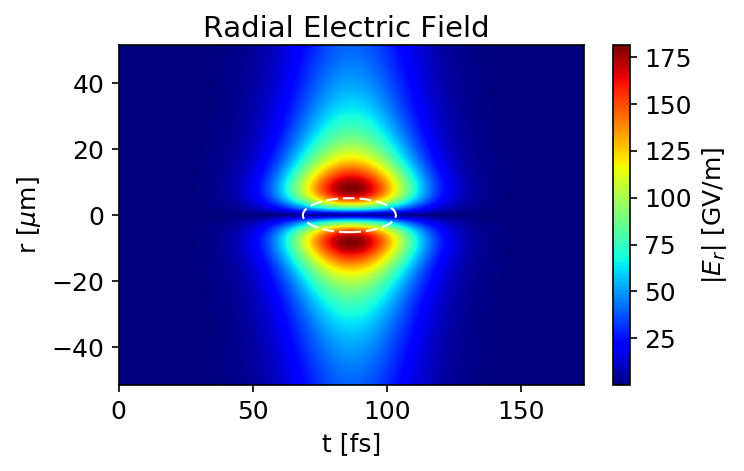

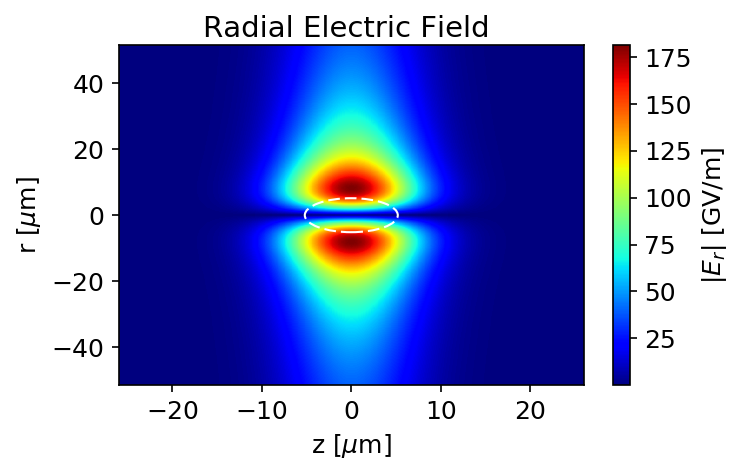

In [39]:
pl.plot_field(Er, pos, beamParams, '$|E_r|$ [GV/m]', ind = 0)

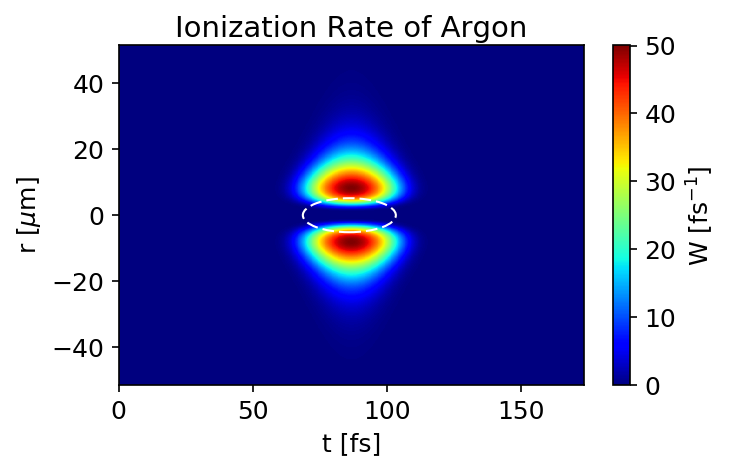

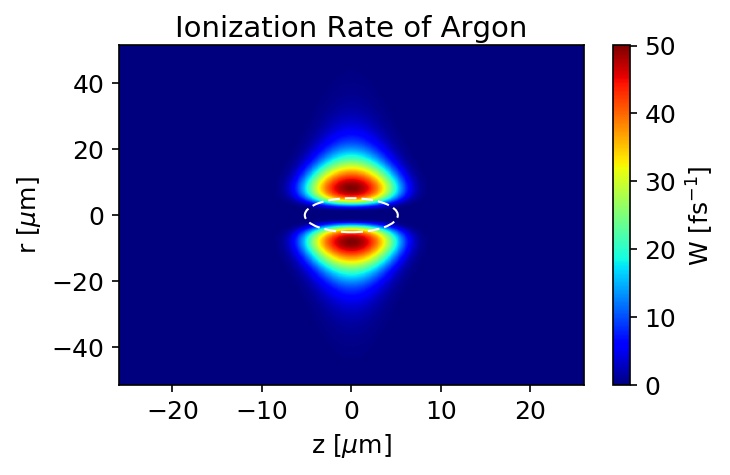

In [40]:
pl.plot_field(W_Ar1, pos, beamParams, 'W [fs$^{-1}$]', \
      ind = 0, gas = True, gasName = 'Argon')

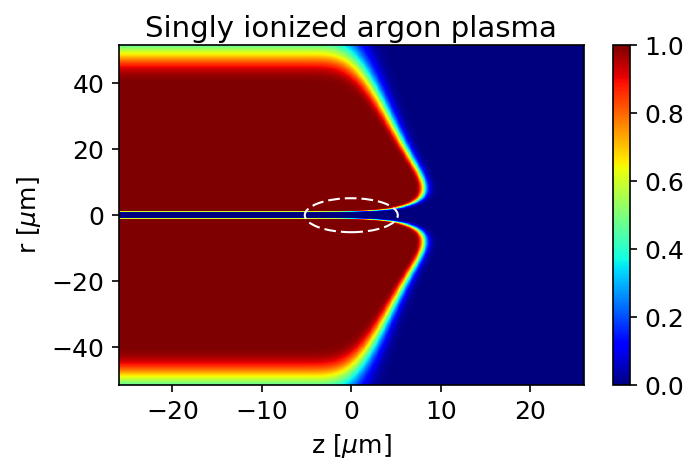

In [46]:
rel(pl)
pl.plot_2D_plasma(W_Ar1, pos, beamParams, 'Singly ionized argon', ind = 0)

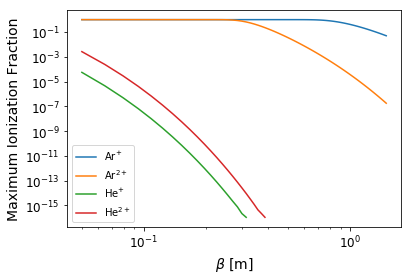

In [24]:
eBeam2.plot_max_frac(max_frac, beamParams, plasmaNames, fs = 14, lw = 1.5, log = True)

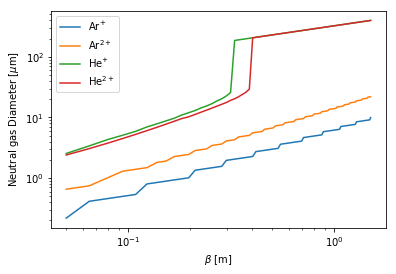

In [25]:
eBeam2.plot_width(widths, plasmaNames, beamParams, log = True)

In [26]:
# Maximum ionazation rate for a given beta (facet II) varying sigma_z
sigma_zz = np.linspace(5e-6, 20e-6, 100);
sigma_rz = 5e-6;
sigma_tz = sigma_z / (beta * c); 
bp = {'sigma_r': sigma_rz, 'sigma_z':sigma_zz, 'sigma_t':sigma_t,
      'charge':1e-9, 'beta':beta
     }
rz = np.linspace(-10*sigma_rz, 10*sigma_rz, 1000)
xiz = np.zeros((len(sigma_zz), 1000))
for i in range(len(sigma_zz)):
    xiz[i][:] = np.linspace(-2*sigma_zz[i], 2*sigma_zz[i], 1000)
p = {'r':rz, 'xi':xiz}
Erz, rzPeak, EzPeak = eBeam2.rad_E_field__sigma_z(p, bp)

In [ ]:
Wz_Ar1 = eBeam2.ionization_rate(Erz, 'Ar+')
Wz_Ar2 = eBeam2.ionization_rate(Erz, 'Ar2+')
Wz_He1 = eBeam2.ionization_rate(Erz, 'He+')
Wz_He2 = eBeam2.ionization_rate(Erz, 'He2+')

In [ ]:
max_Ar1 = eBeam2.ionization_frac_sigma_z(Wz_Ar1, p, bp)
max_Ar2 = eBeam2.ionization_frac_sigma_z(Wz_Ar2, p, bp)
max_He1 = eBeam2.ionization_frac_sigma_z(Wz_He1, p, bp)
max_He2 = eBeam2.ionization_frac_sigma_z(Wz_He2, p, bp)

In [ ]:
plt.semilogy(sigma_zz*1e6, max_Ar1, linewidth = 1.5, label = r'Ar$^{+}$')
plt.semilogy(sigma_zz*1e6, max_Ar2, linewidth = 1.5, label = r'Ar$^{2+}$')
plt.semilogy(sigma_zz*1e6, max_He1, linewidth = 1.5, label = r'He$^{+}$')
plt.semilogy(sigma_zz*1e6, max_He2, linewidth = 1.5, label = r'He$^{2+}$')
plt.xlabel(r'$\sigma_z$ [$\mu$m]', fontsize = 16)
plt.ylabel('Maximum Ionization Fraction', fontsize = 16)
plt.tick_params('both', labelsize = 14)
plt.legend(fontsize = 14)
plt.show()